# **1-3 이진 분류**

#피마인디언 데이터를 이용한 당뇨병 이진 분류

#1. 라이브러리 및 데이터 불러오기

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

diabetes = pd.read_csv('diabetes.csv')
print(diabetes['Outcome'].value_counts())
diabetes.head(5)


0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#2. 정보확인

In [47]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##피마인디언 당뇨병 데이터셋
- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)


#3. 결측치 및 이상치 확인

In [48]:
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
(diabetes[cols]==0).sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

#4. 데이터 시각화

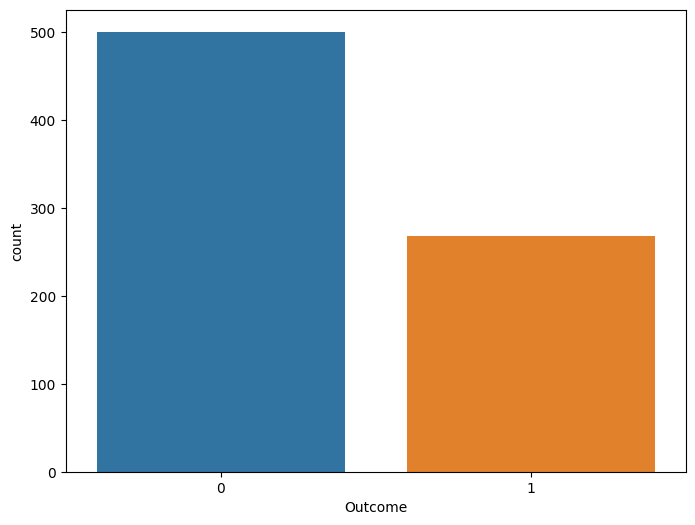

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes)
plt.show()

#5. 범주별 데이터 수

In [51]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#6. 특성과 레이블 분리

In [52]:
X_data = diabetes.drop(['Outcome'],axis = 1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [53]:
y_data=diabetes['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#7. 테스트 데이터 분리

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [55]:
# 이상치 처리

import numpy as np

def impute_zero(data, col):
  df = data.loc[data[col] != 0, col]
  avg = np.sum(df)/len(df)
  k = len(data.loc[data[col] == 0, col])
  data.loc[data[col]==0, col] = avg
  print('%s : fixed %d, mean : %.3f' %(col, k, avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean : 121.847
BloodPressure : fixed 24, mean : 72.239
SkinThickness : fixed 176, mean : 28.596
Insulin : fixed 290, mean : 154.330
BMI : fixed 7, mean : 32.352


In [56]:
#이상치 확인

(X_train[cols] == 0).sum(axis = 0)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [57]:
# 테스트 데이터의 이상치 처리

for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean : 121.052
BloodPressure : fixed 11, mean : 73.091
SkinThickness : fixed 51, mean : 31.524
Insulin : fixed 84, mean : 161.186
BMI : fixed 4, mean : 32.883


In [58]:
# 테스트 데이터 이상치 처리

for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean : 121.052
BloodPressure : fixed 0, mean : 73.091
SkinThickness : fixed 0, mean : 31.524
Insulin : fixed 0, mean : 161.186
BMI : fixed 0, mean : 32.883


#8. 테스트 정규화
- 표준 정규화

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


#9. 넘파이 배열로 타입 변경

In [60]:
# 이상치 존재여부 확인

y_train = y_train.values
y_test = y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#10. 모델 만들기

In [61]:
from keras.layers.rnn.lstm_v1 import activations
# keras를 이용해 모델 구성

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12, input_dim = 8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [62]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


#11. 모델 컴파일
- 이진 분류 모델의 학습을 위한 loss함수를 binary_crossentropy르 설정

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

#12. 모델 학습

In [64]:
EPOCHS = 100 #500으로 실행
BATCH_SIZE =16
history = model.fit(X_train_s, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2,
                    verbose = 1)

Epoch 1/100
31/31 [==============================] - 2s 10ms/step - loss: 0.5956 - acc: 0.6660 - val_loss: 0.5632 - val_acc: 0.7154
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5584 - acc: 0.6945 - val_loss: 0.5439 - val_acc: 0.7236
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5360 - acc: 0.7149 - val_loss: 0.5316 - val_acc: 0.7236
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5210 - acc: 0.7332 - val_loss: 0.5183 - val_acc: 0.7317
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5075 - acc: 0.7434 - val_loss: 0.5062 - val_acc: 0.7480
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4962 - acc: 0.7556 - val_loss: 0.4981 - val_acc: 0.7480
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.4882 - acc: 0.7678 - val_loss: 0.4888 - val_acc: 0.7480
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.4794 - 

#13. 학습곡선

In [65]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

  plt.show()

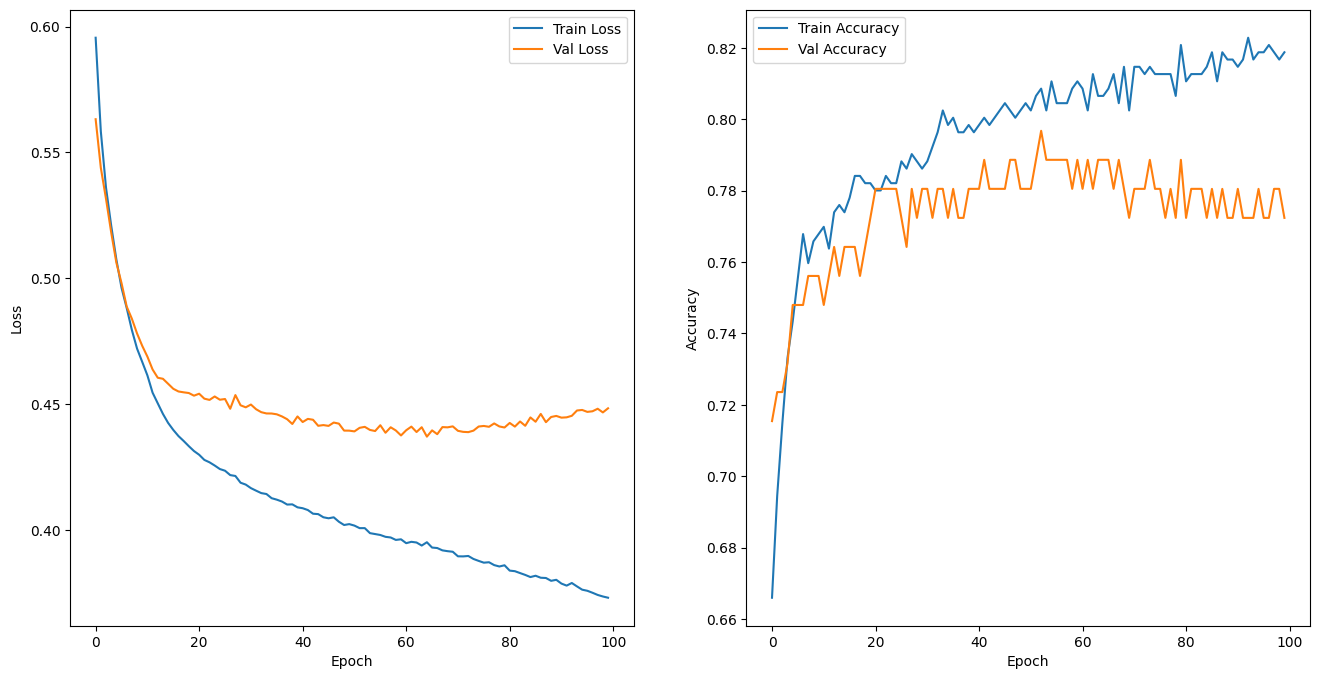

In [66]:
plot_history(history)

# 당뇨병 이진분류에 콜백 함수 적용

## 1. 모델 생성과 컴파일

##2. 정보확인

##3. 학습 모델

##4. 예측

##5. 예측결과 확인

##6. 혼동 행력 시각화(confusion matrix)

##7.평가지표 계산(precision, recall, f1_score)

##8. 평가 지표 출력

# ***코드 넣기***

# 이진분류

## 1-3 당뇨병 예측을 위한 콜백 함수

## 1. 모델 생성과 컴파일

In [68]:
from tensorflow import keras

model = build_model()
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

##2. 정보확인

In [69]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           patience = 10)

##3. 학습 모델
- 콜백 기능을 사용해서 모델 학습 진행

In [70]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           patience = 10)

EPOCHS = 100 #500으로 실행
BATCH_SIZE =16
history = model.fit(X_train_s, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2,
                    callbacks = [early_stop],
                    verbose = 1)

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 0.9450 - acc: 0.3523 - val_loss: 0.8044 - val_acc: 0.3902
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7806 - acc: 0.4114 - val_loss: 0.6981 - val_acc: 0.5203
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6755 - acc: 0.5621 - val_loss: 0.6275 - val_acc: 0.6585
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6030 - acc: 0.6802 - val_loss: 0.5811 - val_acc: 0.6992
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5578 - acc: 0.7251 - val_loss: 0.5540 - val_acc: 0.6911
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5311 - acc: 0.7312 - val_loss: 0.5370 - val_acc: 0.6911
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5137 - acc: 0.7536 - val_loss: 0.5228 - val_acc: 0.6911
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5024 - a

##4. 예측

In [71]:
y_pred = model.predict(X_test_s)
y_pred

5/5 [==============================] - 0s 3ms/step


array([[5.71517527e-01],
       [1.01302728e-01],
       [9.65546966e-02],
       [1.79404587e-01],
       [4.74619657e-01],
       [5.75662374e-01],
       [9.81539837e-04],
       [6.78823709e-01],
       [7.73956060e-01],
       [4.83400702e-01],
       [1.75403520e-01],
       [9.35174584e-01],
       [1.99008673e-01],
       [3.36570650e-01],
       [3.28855813e-02],
       [4.56131905e-01],
       [9.61960331e-02],
       [4.74188402e-02],
       [9.07705963e-01],
       [6.42705679e-01],
       [1.87508300e-01],
       [2.08821390e-02],
       [5.67919016e-01],
       [5.47048301e-02],
       [5.27841449e-01],
       [9.15378511e-01],
       [6.99883327e-02],
       [4.57425741e-03],
       [8.34275559e-02],
       [9.13504586e-02],
       [9.59871531e-01],
       [7.41569817e-01],
       [9.34485018e-01],
       [9.51017737e-01],
       [8.05830956e-01],
       [7.51948595e-01],
       [5.17157316e-01],
       [3.07638615e-01],
       [9.82195139e-02],
       [5.27726471e-01],


##5. 예측결과 확인
- 예측값은 0과 1사이이의 값으로 출력, 0.5를 기준으로 결과 판정


In [72]:
y_pred = (y_pred > 0.5).astype(np.int32).flatten()
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

##6. 혼동 행력 시각화(confusion matrix)

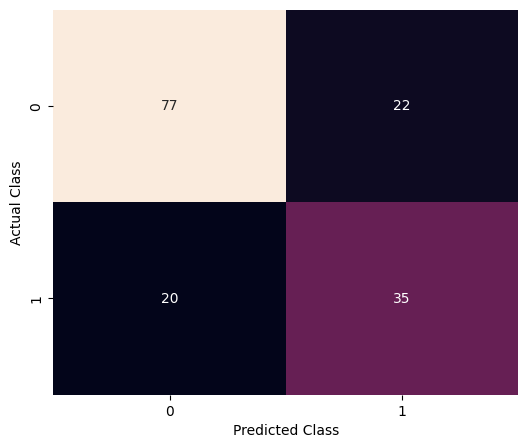

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,5))
sns.heatmap(cf_matrix, annot = True, cbar = False)

plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

##7.평가지표 계산(precision, recall, f1_score)

In [74]:
from sklearn.metrics import precision_score,  recall_score, f1_score
def print_score(y_test, y_pred):
  print('precision : %.3f'% (precision_score(y_test, y_pred)))
  print('recall_score : %.3f'% (recall_score(y_test, y_pred)))
  print('f1_score : %.3f'% (f1_score(y_test, y_pred)))

In [75]:
print_score(y_test, y_pred)

precision : 0.614
recall_score : 0.636
f1_score : 0.625


##8. 평가 지표 출력

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



# Auto MPG를 이용한 자동차 연비 예측

In [2]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('./auto-mpg.csv', header = 0, engine = 'python')

# 금융상품 갱신 여부 예측하는 인공신경망 구성하기

In [ ]:
# 라이브러리 호출

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 데이터 확인

df = pd.read_csv('./fly-AI/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# 학습 할 데이터와 예측 데이터 설정
### 학습 데이터 X
### 학습에 필요한 데이터만 추출

In [ ]:
# 학습할 데이터 설정 [CreditScore:EstimatedSalary]
X = df.iloc[ : , 3:-2+1 ]
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
# 예측 할 데이터 설정
y = df['Exited']
y.head() # 0과 1로 구분, 1:갱신/0:미갱신

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 문자열 데이터 숫자로 치환
###컬럼에서 Geography와 Gender가 문자열로 되어 있으므로 컴퓨터가 학습 할 수 있게 정수로 변경
- 절차 : 각 컬럼의 고유 값 갯수 확인 > 카테고리컬 인코딩 진행
- 카테고리컬 인코딩 : 고유값이 2개일 경우 Label Encoding, 2개 초과일 경우 OneHot Encoding

In [ ]:
# 문자열 데이터 고유값 확인
print('Geography : ', X['Geography'].unique())
print('Gender : ', X['Gender'].unique())

Geography :  ['France' 'Spain' 'Germany']
Gender :  ['Female' 'Male']


In [ ]:
# 카테고리컬 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 성별은 고유값이 2개이므로 레이블 인코딩 진행
l_encoder_gender = LabelEncoder()
X['Gender'] = l_encoder_gender.fit_transform( X['Gender'] )

# 국가는 고유값이 3개이므로 원핫 인코딩 진행
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [1] ) ], remainder='passthrough')
X = ct.fit_transform(X)

# 최적화를 위해 컬럼 하나 삭제
# 이유? 3개의 컬럼 중 원핫 인코딩의 0 0 이 되는 부분이 다른 컬럼이기 때문
# germany  spain
# 0         0
# 0         1
# 1         0
# France 컬럼 제외
X = X[ : , 1: ]

# 피쳐 스케일링
## 서로 다른 범위의 정수의 데이터들을 일정 범위에 맞게 피쳐 스케일링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

# 6. 인공지능 학습을 위한 학습 데이터와 검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# 7. 인공신경망 모델링
- 모델링 변수 지정 (변수 : model)

In [ ]:
model =Sequential()

In [ ]:
# 첫번째 레이어 input layer 추가
# 유닛 6개, 전달 값 11개
model.add( Dense(units=6, activation='relu', input_shape=(11,)) )

# 두번째 레이어 hidden layer 추가
# 첫번째 레이어에서 입력층의 크기를 정했으므로 생략 가능
# 유닛 8개, input layer에서 전달 받는 값 11개
model.add( Dense(units=8, activation=tf.nn.relu ) )

# 세번째 레이어 output layer 추가
model.add( Dense(units=1, activation='sigmoid') )

## 컴파일
### loss='binary_crossentropy'
- 출력 값이 두개인 이진 분류에서 사용
- 모델의 마지막 레이어의 활성화 함수는 시그모이드 함수 사용
### metrics=['accuracy']
- 모델의 정확도 출력
- 분류 문제의 인공지능 모델에서 사용

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
# 파라미터 = 가중치(weight)
# 11 * 6 = 66 ->  72?
# -> 상수 하나가 포함되기 때문에 12 * 6 -> 72

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 72        
                                                                 
 dense_15 (Dense)            (None, 8)                 56        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


## 학습 및 측정
- epochs : 전체 데이터셋을 몇 번 반복 학습할지 설정
-- 만약 100이면, 서로 다른 값 100개의 가중치로 반복 학습을 진행하여 모델의 성능을 향상시킴
- batch_size : N개의 샘플로 테스트하여 가중치를 갱신할지를 설정
-- 배치 사이즈가 클수록 많은 데이터를 저장해두어야 하므로 용량이 커짐
-- 배치 사이즈가 작을수록 학습률은 높지만 가중치 갱신률이 높아져서 시간이 오래 걸림
-- 예 ) epochs=100, batch_size=100 : 모두 예측한 뒤 실제 값과 비교 후 가중치 갱신
-- 예 ) epochs=100, batch_size=50 : 반절을 예측한 뒤 실제 값과 비교 후 가중치 갱신, 나머지 다시 예측

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
800/800 [==============================] - 4s 2ms/step - loss: 0.5263 - accuracy: 0.7666
Epoch 2/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7985
Epoch 3/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.8016
Epoch 4/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8091
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8119
Epoch 6/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8166
Epoch 7/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4260 - accuracy: 0.8186
Epoch 8/20
800/800 [==============================] - 3s 3ms/step - loss: 0.4242 - accuracy: 0.8209
Epoch 9/20
800/800 [==============================] - 2s 3ms/step - loss: 0.4208 - accuracy: 0.8254
Epoch 10/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8260

## 모델 평가
- 텐서플로우는 자체적으로 검증해주는 함수 존재 (evaluate)
--정확도를 나타내는 함수는 분류 문제의 인공지능 모델에서 사용

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8395


[0.4040450155735016, 0.8395000100135803]

In [ ]:
# 예측

y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# 실제값과 예측값 확인

# 실제값은 0과 1로 구성
y_test

# 예측 값은 0과 1사이의 실수로 구성
y_pred

array([[0.27425614],
       [0.35522446],
       [0.15112267],
       ...,
       [0.1349959 ],
       [0.17464113],
       [0.1753218 ]], dtype=float32)

In [ ]:
# y_pred는 0과 1로 구분하기 위해 데이터 가공
# 0.5 초과 > True
# 0.5 이하 > False
y_pred = (y_pred>0.5).astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## 결과 지표 (컨퓨전 매트릭스)
- 결과 지표는 인공지능 모델이 맞춘 것과 못 맞춘 것을 나타내므로 분류 문제에서 사용

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[1536,   59],
       [ 262,  143]])

In [ ]:
# 수동으로 정확도 계산하기
cm = confusion_matrix(y_test, y_pred)
(1546+152) / cm.sum()

0.849